In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
# !pip install jovian --upgrade -q
# import jovian
# jovian.set_project('04-feedforward-nn')
# jovian.set_colab_id('1MpYqKQx0ztlUM4-OGJsq-xteATKaZtI-')

In [2]:
import torch
import torchvision
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline

# Use a white background for matplotlib figures
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [3]:
dataset = MNIST(root='data/', download=True, transform=ToTensor())

C:\Users\yashr\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
image , label = dataset[0]
print(image.shape)
print(image.permute(1,2,0).shape)

torch.Size([1, 28, 28])
torch.Size([28, 28, 1])


image.shape: torch.Size([1, 28, 28])
Label: 5


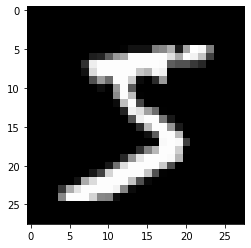

In [5]:
image, label = dataset[0]
print('image.shape:', image.shape)
plt.imshow(image.permute(1, 2, 0), cmap='gray')
print('Label:', label)

In [6]:
val_size = 10000
train_size = len(dataset)-val_size

train_ds , val_ds = random_split(dataset , [train_size , val_size])
len(train_ds) , len(val_ds)

(50000, 10000)

In [7]:
batch_size = 128

In [8]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

images.shape: torch.Size([128, 1, 28, 28])


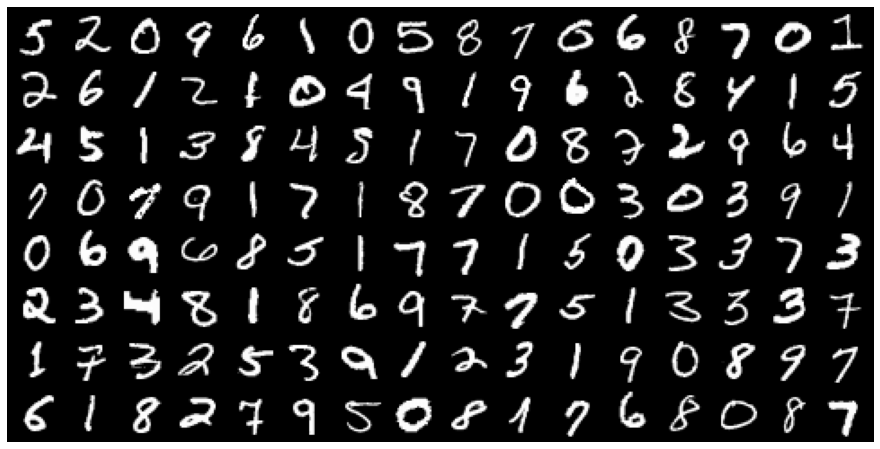

In [9]:
for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

In [10]:
for images, labels in train_loader:
    print('images.shape:', images.shape)
    inputs = images.reshape(-1, 784)
    print('inputs.shape:', inputs.shape)
    break

images.shape: torch.Size([128, 1, 28, 28])
inputs.shape: torch.Size([128, 784])


In [11]:
input_size = inputs.shape[-1]
hidden_size = 32

In [12]:
input_size

784

In [13]:
layer1 = nn.Linear(input_size, hidden_size)

In [14]:
inputs.shape

torch.Size([128, 784])

In [15]:
for parameter in layer1.parameters():
    print(parameter.shape)

torch.Size([32, 784])
torch.Size([32])


In [16]:
layer1_outputs = layer1(inputs)
print('layer1_outputs.shape:', layer1_outputs.shape)

layer1_outputs.shape: torch.Size([128, 32])


In [17]:
layer1_outputs_direct = inputs @ layer1.weight.t() + layer1.bias
layer1_outputs_direct.shape

torch.Size([128, 32])

In [18]:
torch.allclose(layer1_outputs, layer1_outputs_direct, 1e-3)

True

In [19]:
F.relu(torch.tensor([[1, -1, 0], 
                     [-0.1, .2, 3]]))

tensor([[1.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 3.0000]])

In [20]:
for l1 in layer1_outputs:
    print(l1)
    print(l1.shape)
    break

tensor([ 8.8175e-02, -2.7767e-01,  1.0667e-01,  1.2725e-01, -4.8793e-02,
        -5.6910e-01,  1.5960e-01,  7.8354e-02, -2.1699e-01,  1.4911e-01,
         1.5285e-01,  1.1725e-01,  2.1274e-01,  3.0285e-01, -2.1235e-01,
         1.2811e-02,  2.7778e-02, -1.3784e-01,  4.0306e-01,  4.2709e-02,
        -1.1625e-01, -2.4526e-01, -2.1806e-01, -7.4119e-02, -1.6271e-01,
        -1.6977e-04, -5.0887e-02,  9.9536e-02,  5.0224e-01,  3.5108e-01,
         1.2268e-03,  8.7550e-02], grad_fn=<UnbindBackward>)
torch.Size([32])


In [21]:
relu_outputs = F.relu(layer1_outputs)
print('relu_outputs shape : ' , relu_outputs.shape)
print('min(layer1_outputs):', torch.min(layer1_outputs).item())
print('min(relu_outputs)  :', torch.min(relu_outputs).item())

relu_outputs shape :  torch.Size([128, 32])
min(layer1_outputs): -0.7233604192733765
min(relu_outputs)  : 0.0


In [22]:
output_size = 10
layer2 = nn.Linear(hidden_size , output_size)

In [23]:
layer2_outputs = layer2(relu_outputs)
print(layer2_outputs.shape)

torch.Size([128, 10])


In [24]:
relu_outputs.shape

torch.Size([128, 32])

In [25]:
inputs.shape

torch.Size([128, 784])

In [26]:
F.cross_entropy(layer2_outputs, labels)

tensor(2.3246, grad_fn=<NllLossBackward>)

In [27]:
# Same   as layer2(layer1(inputs))
outputs2 = (inputs @ layer1.weight.t() + layer1.bias) @ layer2.weight.t() + layer2.bias

In [28]:
outputs3 = (F.relu(inputs@layer1.weight.t() + layer1.bias) @ layer2.weight.t() + layer2.bias)

In [29]:
torch.allclose(outputs2 , outputs3 , 1e-3)

False

In [30]:
torch.allclose(layer2_outputs , outputs3 , 1e-3)

True

In [31]:
# Create a single layer to replace the two linear layers
combined_layer = nn.Linear(input_size, output_size)

combined_layer.weight.data = layer2.weight @ layer1.weight
combined_layer.bias.data = layer1.bias @ layer2.weight.t() + layer2.bias

In [32]:
# Same as combined_layer(inputs)
outputs4 = inputs @ combined_layer.weight.t() + combined_layer.bias

In [33]:
layer1.weight.shape

torch.Size([32, 784])

In [34]:
layer2.weight.shape

torch.Size([10, 32])

In [35]:
torch.allclose(outputs2 , outputs4 , 1e-3)

True

In [36]:
# Install the library
# !pip install jovian --upgrade --quiet

In [37]:
# import jovian

In [38]:
# jovian.commit(project='04-feedforward-nn')

In [87]:
class MNISTmodel(nn.Module):
    
    def __init__(self , input_size , hidden_size , output_size):
        super().__init__()
        self.linear1 = nn.Linear(input_size , hidden_size)
        self.linear2 = nn.Linear(hidden_size , output_size)
        
    def forward(self , xb):
        xb = xb.view(xb.size(0) , -1)
        out = self.linear1(xb)
        out = F.relu(out)
        out = self.linear2(out)
        return out
    
    def training_step(self,batch):
        images , labels = batch
        out = self(images)
        loss = F.cross_entropy(out , labels)
        return loss
    
    def validation_step(self,batch):
        images , labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out , labels)
        return {'val_loss': loss, 'val_acc': acc}
    
    def validation_epoch_end(self , outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
        
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [40]:
def accuracy(outputs , labels):
    _ , preds = torch.max(outputs , dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [41]:
input_size = 784
hidden_size = 32
output_size = 10

In [42]:
model = MNISTmodel(input_size , hidden_size , output_size)

In [43]:
for t in model.parameters():
    print(t.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


In [44]:
for images , labels in train_loader:
    outputs = model(images)
    loss = F.cross_entropy(outputs , labels)
    print("Loss : " , loss.item())
    break
    
print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

Loss :  2.326573371887207
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.0956,  0.0354,  0.0392, -0.1237, -0.0395, -0.1180,  0.1290, -0.1128,
         -0.0907,  0.0267],
        [ 0.0608,  0.0655, -0.0930, -0.1789, -0.0181, -0.1139,  0.1487, -0.2236,
         -0.1304,  0.1232]])


In [45]:
torch.cuda.is_available()

True

In [46]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [47]:
device = get_default_device()
device

device(type='cuda')

In [48]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [49]:
for images, labels in train_loader:
    print(images.shape)
    print(images.device)
    images = to_device(images, device)
    print(images.device)
    break

torch.Size([128, 1, 28, 28])
cpu
cuda:0


In [50]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [51]:
def some_numbers():
    yield 10
    yield 20
    yield 30

for value in some_numbers():
    print(value)

10
20
30


In [52]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)

In [53]:
for xb, yb in val_loader:
    print('xb.device:', xb.device)
    print('yb:', yb)
    break

xb.device: cuda:0
yb: tensor([7, 9, 8, 8, 4, 9, 2, 2, 9, 4, 5, 8, 4, 5, 4, 2, 2, 4, 5, 5, 0, 8, 5, 9,
        2, 3, 4, 8, 7, 7, 5, 5, 3, 5, 5, 7, 0, 4, 8, 6, 0, 5, 4, 2, 4, 8, 1, 3,
        7, 1, 1, 3, 1, 6, 7, 7, 9, 2, 7, 9, 9, 5, 5, 7, 6, 0, 6, 7, 6, 8, 1, 9,
        0, 3, 0, 6, 7, 9, 6, 7, 0, 0, 3, 5, 1, 5, 2, 2, 1, 6, 1, 4, 4, 9, 4, 1,
        9, 5, 7, 3, 1, 3, 2, 4, 0, 4, 7, 6, 0, 8, 4, 4, 8, 9, 6, 1, 4, 7, 1, 1,
        5, 3, 5, 7, 1, 5, 2, 6, 3, 3, 1, 5, 7, 9, 7, 4, 5, 3, 4, 3, 1, 4, 3, 2,
        9, 9, 1, 7, 2, 7, 0, 0, 6, 8, 4, 4, 1, 6, 3, 3, 6, 4, 6, 2, 5, 3, 5, 2,
        5, 6, 2, 5, 4, 3, 2, 0, 6, 1, 1, 8, 0, 6, 8, 1, 2, 6, 0, 5, 5, 8, 5, 0,
        0, 5, 4, 6, 3, 3, 4, 1, 6, 4, 8, 6, 4, 2, 6, 3, 1, 3, 5, 3, 6, 7, 7, 8,
        7, 4, 7, 7, 8, 5, 0, 9, 1, 3, 6, 7, 0, 1, 7, 1, 4, 1, 1, 7, 1, 2, 2, 7,
        5, 4, 7, 6, 8, 9, 0, 2, 5, 6, 2, 5, 5, 2, 0, 8], device='cuda:0')


In [54]:
def evaluate(model , val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs , lr , model , train_loader , val_loader , opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters() , lr)
    
    for epoch in range(epochs):
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        result = evaluate(model , val_loader)
        model.epoch_end(epoch , result)
        history.append(result)
        
    return history

In [55]:
model = MNISTmodel(input_size , hidden_size , output_size)
to_device(model , device)

MNISTmodel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

In [56]:
history = [evaluate(model, val_loader)]
history

[{'val_loss': 2.320082902908325, 'val_acc': 0.07929687201976776}]

In [57]:
history += fit(5, 0.5, model, train_loader, val_loader)

Epoch [0], val_loss: 0.2263, val_acc: 0.9324
Epoch [1], val_loss: 0.1717, val_acc: 0.9483
Epoch [2], val_loss: 0.1542, val_acc: 0.9541
Epoch [3], val_loss: 0.1485, val_acc: 0.9572
Epoch [4], val_loss: 0.1664, val_acc: 0.9533


In [58]:
history += fit(5, 0.1, model, train_loader, val_loader)

Epoch [0], val_loss: 0.1297, val_acc: 0.9627
Epoch [1], val_loss: 0.1267, val_acc: 0.9639
Epoch [2], val_loss: 0.1252, val_acc: 0.9644
Epoch [3], val_loss: 0.1255, val_acc: 0.9641
Epoch [4], val_loss: 0.1262, val_acc: 0.9655


In [59]:
history += fit(5, 0.1, model, train_loader, val_loader)

Epoch [0], val_loss: 0.1266, val_acc: 0.9648
Epoch [1], val_loss: 0.1278, val_acc: 0.9646
Epoch [2], val_loss: 0.1239, val_acc: 0.9665
Epoch [3], val_loss: 0.1245, val_acc: 0.9643
Epoch [4], val_loss: 0.1232, val_acc: 0.9661


In [60]:
history += fit(5, 0.01, model, train_loader, val_loader)

Epoch [0], val_loss: 0.1221, val_acc: 0.9662
Epoch [1], val_loss: 0.1221, val_acc: 0.9660
Epoch [2], val_loss: 0.1218, val_acc: 0.9664
Epoch [3], val_loss: 0.1217, val_acc: 0.9662
Epoch [4], val_loss: 0.1222, val_acc: 0.9657


In [61]:
history += fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.1220, val_acc: 0.9660
Epoch [1], val_loss: 0.1220, val_acc: 0.9660
Epoch [2], val_loss: 0.1219, val_acc: 0.9659
Epoch [3], val_loss: 0.1219, val_acc: 0.9658
Epoch [4], val_loss: 0.1219, val_acc: 0.9658


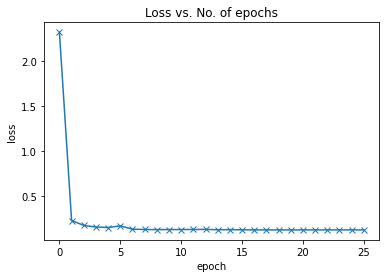

In [62]:
losses = [x['val_loss'] for x in history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs');

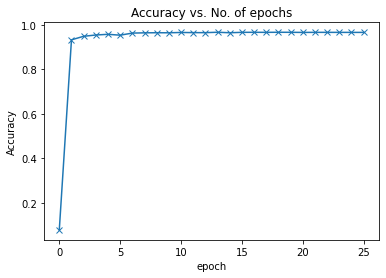

In [63]:
losses = [x['val_acc'] for x in history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. No. of epochs');

In [64]:
!pip install jovian --upgrade -q

In [65]:
import jovian

In [66]:
jovian.commit(project='04-feedforward-nn', environment=None)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "yashrsakaria1/04-feedforward-nn" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/yashrsakaria1/04-feedforward-nn


'https://jovian.ai/yashrsakaria1/04-feedforward-nn'

In [68]:
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=ToTensor())

In [72]:
def predict_img(image , model):
    image = to_device(image.unsqueeze(0) , device)
    out = model(image)
    _ , preds = torch.max(out , dim = 1)
    return preds[0].item()

Label: 7 , Predicted: 7


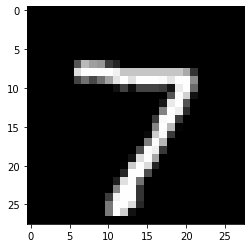

In [73]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_img(img, model))

Label: 2 , Predicted: 2


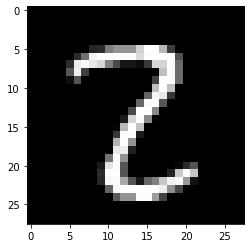

In [74]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_img(img, model))

Label: 9 , Predicted: 9


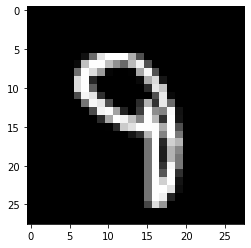

In [76]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_img(img, model))

In [77]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size=256), device)
result = evaluate(model, test_loader)
result

{'val_loss': 0.09571874886751175, 'val_acc': 0.9697265625}

In [78]:
jovian.log_metrics(test_loss=result['val_loss'], test_acc=result['val_loss'])

[jovian] Metrics logged.


In [79]:
torch.save(model.state_dict(), 'mnist-feedforward.pth')

In [80]:
jovian.commit(project='04-feedforward-nn', 
              environment=None, 
              outputs=['mnist-feedforward.pth'])

<IPython.core.display.Javascript object>

[jovian] Updating notebook "yashrsakaria1/04-feedforward-nn" on https://jovian.ai/
[jovian] Uploading additional outputs...
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/yashrsakaria1/04-feedforward-nn


'https://jovian.ai/yashrsakaria1/04-feedforward-nn'